<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_ANN_multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning

## SECTION: ANNs

### LECTURE: Multilayer ANNs

#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create data
nPerClust = 100
blur = 1

In [4]:
A = [1,  3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))
labels_np.shape

(200, 1)

In [5]:
# concatenate into a matrix
data_np = np.hstack((a, b)).T
data_np.shape

(200, 2)

In [6]:
# convert to a pytorch tensor
data = torch.tensor(data_np, dtype=torch.float32)
labels = torch.tensor(labels_np).float()

In [7]:
data.dtype

torch.float32

In [8]:
labels.dtype

torch.float32

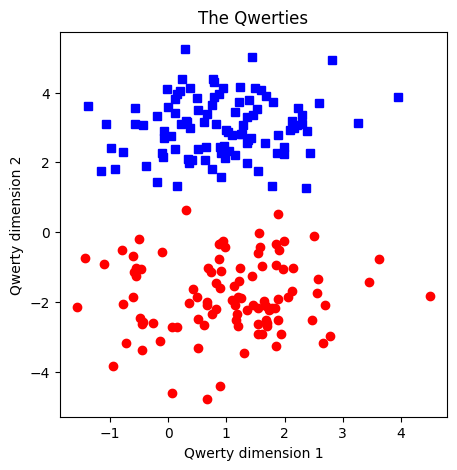

In [9]:
# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ro')
plt.title("The Qwerties")
plt.xlabel("Qwerty dimension 1")
plt.ylabel("Qwerty dimension 2")
plt.show()

In [10]:
np.where(labels==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [11]:
np.where(labels==0)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
data[np.where(labels==0)[0], 0]

tensor([ 1.0415e+00,  6.1184e-01,  9.9917e-01,  1.9997e+00,  2.8235e+00,
         1.2469e+00,  3.2113e-01,  1.5285e+00, -1.0586e+00,  2.3429e-01,
         7.9282e-01,  1.3832e+00, -5.7156e-01,  1.1570e+00,  1.1056e+00,
         1.2269e+00, -6.3063e-02,  1.4540e+00,  9.7051e-01, -1.0624e-01,
         1.2231e-01,  7.5469e-01,  9.3639e-01,  3.6647e-01,  2.0832e-01,
         1.6613e+00,  1.1631e-01, -4.2372e-01,  1.3495e+00,  2.3742e+00,
         2.3912e+00,  1.7843e+00,  2.1215e+00, -9.0431e-01,  3.7863e-01,
        -1.9596e-01,  8.2266e-01,  2.4361e+00,  4.1021e-01,  4.9345e-01,
         7.7777e-01, -6.9382e-02,  1.8714e+00,  1.5517e+00,  1.1436e+00,
        -1.8743e-01,  6.7119e-01,  3.0517e-01,  1.3495e+00,  2.2384e+00,
         3.9463e+00,  2.3080e+00,  6.5515e-01,  2.2138e+00,  1.9894e+00,
         2.5981e+00,  5.0891e-01,  2.1685e-01,  9.1470e-01,  1.5915e+00,
         1.8085e+00,  8.9781e-01,  1.2399e+00,  1.2922e+00,  1.6752e+00,
         1.4298e+00,  2.0967e+00,  1.5987e-01,  2.0

In [13]:
data[np.where(labels==0)[0]]

tensor([[ 1.0415e+00,  2.3151e+00],
        [ 6.1184e-01,  3.1668e+00],
        [ 9.9917e-01,  2.9330e+00],
        [ 1.9997e+00,  2.4476e+00],
        [ 2.8235e+00,  4.9241e+00],
        [ 1.2469e+00,  2.8151e+00],
        [ 3.2113e-01,  3.1660e+00],
        [ 1.5285e+00,  3.5313e+00],
        [-1.0586e+00,  3.1070e+00],
        [ 2.3429e-01,  4.3781e+00],
        [ 7.9282e-01,  4.2902e+00],
        [ 1.3832e+00,  3.7786e+00],
        [-5.7156e-01,  3.5603e+00],
        [ 1.1570e+00,  2.2087e+00],
        [ 1.1056e+00,  2.7964e+00],
        [ 1.2269e+00,  3.7245e+00],
        [-6.3063e-02,  2.8922e+00],
        [ 1.4540e+00,  3.3479e+00],
        [ 9.7051e-01,  2.1304e+00],
        [-1.0624e-01,  2.2778e+00],
        [ 1.2231e-01,  3.4122e+00],
        [ 7.5469e-01,  1.8050e+00],
        [ 9.3639e-01,  4.1440e+00],
        [ 3.6647e-01,  1.9706e+00],
        [ 2.0832e-01,  4.0385e+00],
        [ 1.6613e+00,  2.5584e+00],
        [ 1.1631e-01,  2.3909e+00],
        [-4.2372e-01,  3.071

In [14]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 16),  # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(16, 1),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(1, 1),   # output unit
      nn.Sigmoid()       # final activation unit
  )

  # loss function
  loss_fn = nn.BCELoss()  # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  return ANNclassify, loss_fn, optimizer

In [15]:
# a function that trains the model

# a fixed parameter
num_epochs = 700

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(num_epochs)

  # loop over epochs
  for epoch_i in range(num_epochs):
    # forward pass
    y_hat = ANNmodel(data)

    # compute loss
    loss = loss_fn(y_hat, labels)
    losses[epoch_i] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: Wasn't this > 0 previously?
  total_acc = 100 * torch.mean(((predictions > .5) == labels).float())

  return losses, predictions, total_acc

Accuracy: 99%


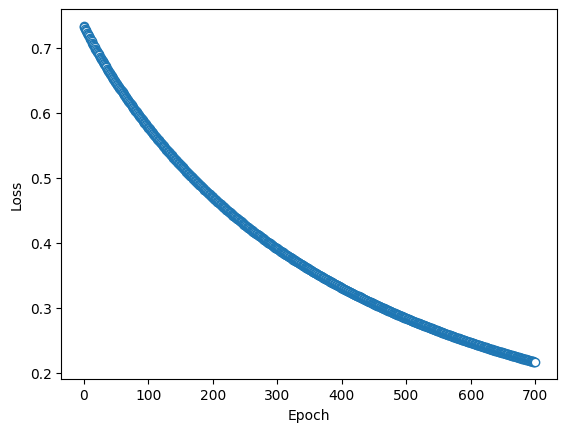

In [16]:
# create everything
ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=.01)

# run it
losses, predictions, total_acc = trainTheModel(ANNclassify)

# report accuracy
print(f"Accuracy: {total_acc:.2g}%")

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
# Learning rates
learning_rates = np.linspace(.001, .1, 50)

# initialize
accByLR = []
allLosses = np.zeros((len(learning_rates), num_epochs))

# The loop
for i, lr in enumerate(learning_rates):

  # create and run the model
  ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=lr)
  losses, predictions, total_acc = trainTheModel(ANNclassify)

  # save the results
  accByLR.append(total_acc)
  allLosses[i, :] = losses.detach()

<ipython-input-17-7990ae13b394>:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i, :] = losses.detach()


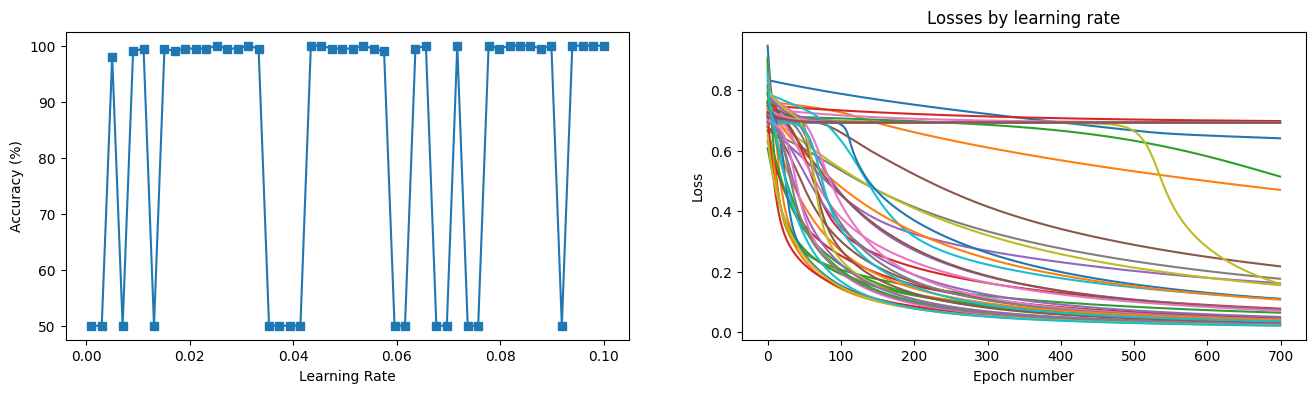

In [18]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learning_rates, accByLR, 's-')
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy (%)")
#ax[0].set_xscale("log")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [19]:
accByLR

[tensor(50.),
 tensor(50.),
 tensor(98.),
 tensor(50.),
 tensor(99.),
 tensor(99.5000),
 tensor(50.),
 tensor(99.5000),
 tensor(99.),
 tensor(99.5000),
 tensor(99.5000),
 tensor(99.5000),
 tensor(100.),
 tensor(99.5000),
 tensor(99.5000),
 tensor(100.),
 tensor(99.5000),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(99.5000),
 tensor(99.5000),
 tensor(99.5000),
 tensor(100.),
 tensor(99.5000),
 tensor(99.),
 tensor(50.),
 tensor(50.),
 tensor(99.5000),
 tensor(100.),
 tensor(50.),
 tensor(50.),
 tensor(100.),
 tensor(50.),
 tensor(50.),
 tensor(100.),
 tensor(99.5000),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(99.5000),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(100.)]

In [20]:
sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(0.7000)

In [21]:
# 1) The code creates a model with 16 hidden units. Notice where the two "16"s appear when constructing the model.
#    Recreate the model using 32 hidden units. Does that help with the issue of models getting stuck in local minima?
#
# 2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second
#    hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?
#

In [22]:
## 1 - Recreating the model with 32 hidden units instead of 16
def createANNmodel(learningRate, num_hiddens=32):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, num_hiddens),  # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(num_hiddens, 1),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(1, 1),   # output unit
      nn.Sigmoid()       # final activation unit
  )

  # loss function
  loss_fn = nn.BCELoss()  # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  return ANNclassify, loss_fn, optimizer

In [22]:
# a function that trains the model

# a fixed parameter
num_epochs = 700

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(num_epochs)

  # loop over epochs
  for epoch_i in range(num_epochs):
    # forward pass
    y_hat = ANNmodel(data)

    # compute loss
    loss = loss_fn(y_hat, labels)
    losses[epoch_i] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: Wasn't this > 0 previously?
  total_acc = 100 * torch.mean(((predictions > .5) == labels).float())

  return losses, predictions, total_acc

Accuracy: 99%


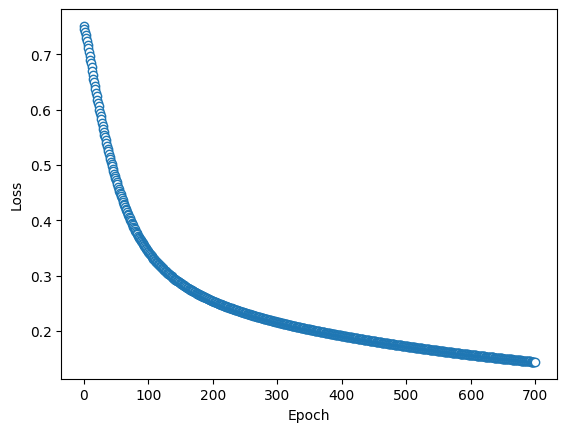

In [23]:
# create everything
ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=.01)

# run it
losses, predictions, total_acc = trainTheModel(ANNclassify)

# report accuracy
print(f"Accuracy: {total_acc:.2g}%")

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [24]:
# Learning rates
learning_rates = np.linspace(.001, .1, 50)

# initialize
accByLR = []
allLosses = np.zeros((len(learning_rates), num_epochs))

# The loop
for i, lr in enumerate(learning_rates):

  # create and run the model
  ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=lr)
  losses, predictions, total_acc = trainTheModel(ANNclassify)

  # save the results
  accByLR.append(total_acc)
  allLosses[i, :] = losses.detach()

<ipython-input-24-7990ae13b394>:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i, :] = losses.detach()


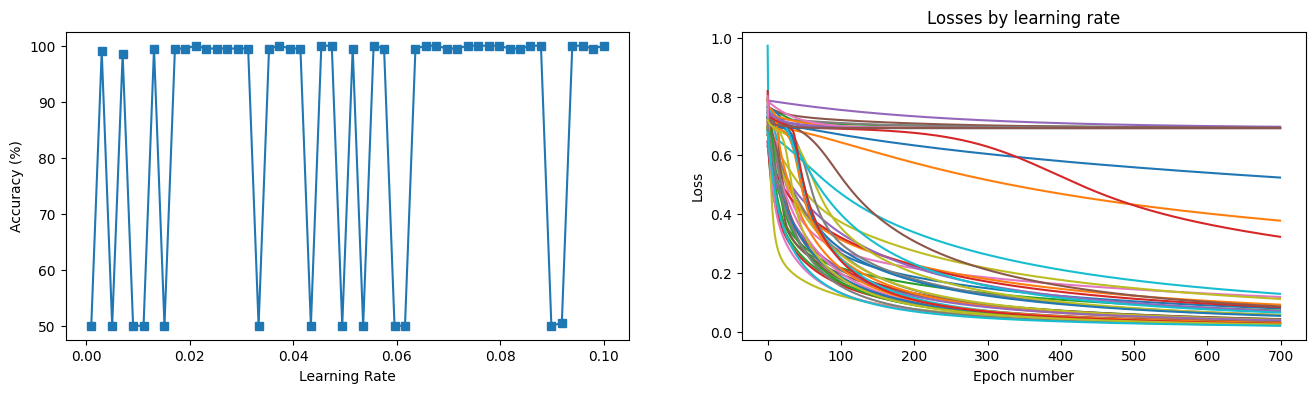

In [25]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learning_rates, accByLR, 's-')
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy (%)")
#ax[0].set_xscale("log")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [26]:
sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(0.7400)

In [37]:
# 2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second
#    hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?

## 1 - Recreating the model with 32 hidden units instead of 16
def createANNmodel(learningRate, num_hiddens=[16, 32]):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, num_hiddens[0]),  # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(num_hiddens[0], num_hiddens[1]),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(num_hiddens[1], 1),
      nn.ReLU(),
      nn.Linear(1, 1),   # output unit
      nn.Sigmoid()       # final activation unit
  )

  # loss function
  loss_fn = nn.BCELoss()  # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  return ANNclassify, loss_fn, optimizer

In [38]:
# a function that trains the model

# a fixed parameter
num_epochs = 1000

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(num_epochs)

  # loop over epochs
  for epoch_i in range(num_epochs):
    # forward pass
    y_hat = ANNmodel(data)

    # compute loss
    loss = loss_fn(y_hat, labels)
    losses[epoch_i] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: Wasn't this > 0 previously?
  total_acc = 100 * torch.mean(((predictions > .5) == labels).float())

  return losses, predictions, total_acc

In [39]:
ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=.01)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1, out_features=1, bias=True)
  (7): Sigmoid()
)

Accuracy: 1e+02%


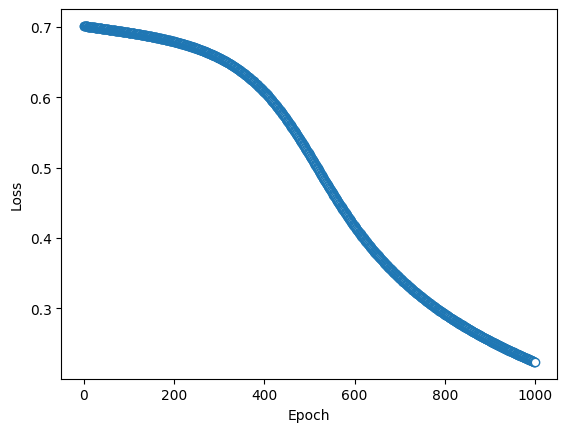

In [40]:
# create everything
ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=.01)

# run it
losses, predictions, total_acc = trainTheModel(ANNclassify)

# report accuracy
print(f"Accuracy: {total_acc:.2g}%")

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [41]:
# Learning rates
learning_rates = np.linspace(.001, .1, 50)

# initialize
accByLR = []
allLosses = np.zeros((len(learning_rates), num_epochs))

# The loop
for i, lr in enumerate(learning_rates):

  # create and run the model
  ANNclassify, loss_fn, optimizer = createANNmodel(learningRate=lr)
  losses, predictions, total_acc = trainTheModel(ANNclassify)

  # save the results
  accByLR.append(total_acc)
  allLosses[i, :] = losses.detach()

<ipython-input-41-7990ae13b394>:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i, :] = losses.detach()


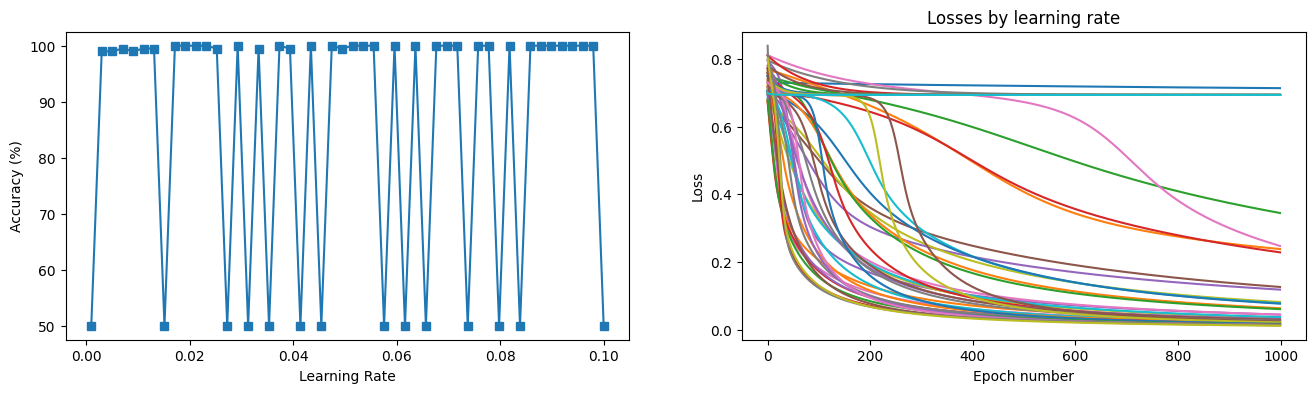

In [42]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learning_rates, accByLR, 's-')
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy (%)")
#ax[0].set_xscale("log")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [43]:
sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(0.7200)